# Introduction

**Author**: Damien Delforge - damien.delforge@uclouvain.be

**Date**: 14th of March, 2018

We use `scipy.stats` methods to model monthly extreme values of a hourly rainfall time series.

## Basics

When we apply a statistical distribution model to a time series, we assume that it is a **random variable**. We consider each time step as being **independent** (meaning that they should not influence each other) and doing so, we neglect the chronology. It is a strong assumption (and wrong as any model's assumption) but it is still a useful and powerful tool to cast predictions and have an idea of the probability of occurrence of an event. However, we will not know why and when it will happen.  

Statistical models are mostly defined for continuous variable and represented by a continuous curve, like the famous Gaussian bell curve: 
$$
f(x) 
$$

what we observed from a monitored time series is a finite amount of discrete variable. 


## See also

* [`scipy.stats` statistical function](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)
* [`scipy.stats` tutorial](https://docs.scipy.org/doc/scipy-1.0.0/reference/tutorial/stats.html)
* Rodda, Harvey J. E., and Max A. Little. Understanding Mathematical and Statistical Techniques in Hydrology: An Examples-Based Approach. John Wiley & Sons, 2015.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import gumbel_r, weibull_min, genextreme
%matplotlib inline
print('Scipy version: ', scipy.__version__)

Scipy version:  1.0.0


# Load and visualize data

          RF [mm]
count  360.000000
mean     5.897500
std      4.426436
min      0.700000
25%      3.100000
50%      4.500000
75%      7.025000
max     32.500000


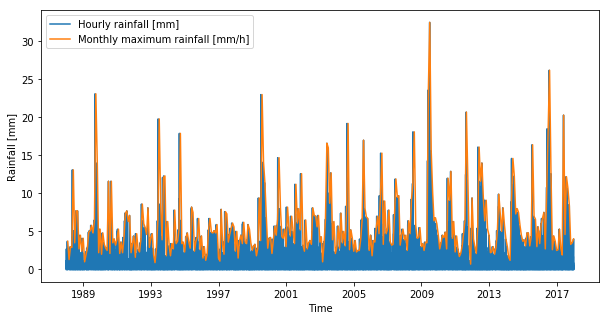

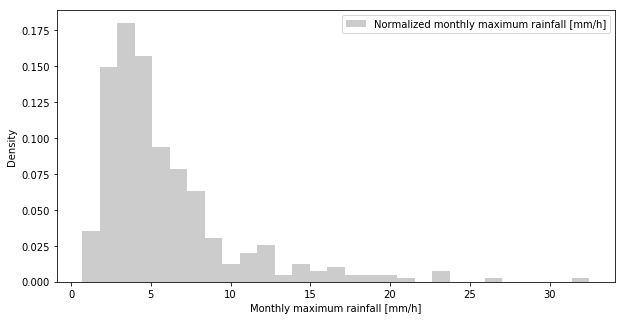

In [2]:
# Data resampling and extreme statistics

df = pd.read_csv('data/rainfall.csv', index_col=0, parse_dates=True)
# monthly maximum of houly rainfall
extreme = df.resample('M').max()[1:]
print(extreme.describe())

fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.plot(df.index, df['RF [mm]'], label='Hourly rainfall [mm]')
ax.plot(extreme.index, extreme, label='Monthly maximum rainfall [mm/h]')
ax.set_xlabel('Time')
ax.set_ylabel('Rainfall [mm]')
ax.legend()

fig = plt.figure(figsize=(10,5))
ax2 = fig.gca()
ax2.hist(extreme['RF [mm]'], bins='auto', normed=True, color='k', alpha=0.2, label='Normalized monthly maximum rainfall [mm/h]')
ax2.set_xlabel('Monthly maximum rainfall [mm/h]')
ax2.set_ylabel('Density')
ax2.legend()

# Fitting extreme value distribution

We selected the following distribution to be compared:
* [Right-skewed Gumbel distribution](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.stats.gumbel_r.html#scipy.stats.gumbel_r)
* [Minimum Weibull distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html#scipy.stats.weibull_min)
* [Generalized Extreme Values](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html#scipy.stats.genextreme)

We proceed as follows:

1. We fit a model to retrieve the optimal paramters using the `fit` method
2. We use the model with optimal parameters to build the Probability Density Function of our variable of interest.

In [3]:
# Gumbel's law

params_gr = gumbel_r.fit(extreme)
gr = gumbel_r(*params_gr)

# Weibull's law

params_wb = weibull_min.fit(extreme)
wb = weibull_min(*params_wb)

# Generalized extreme value
params_gev = genextreme.fit(extreme)
gev = genextreme(*params_gev)

# Plotting the distributions

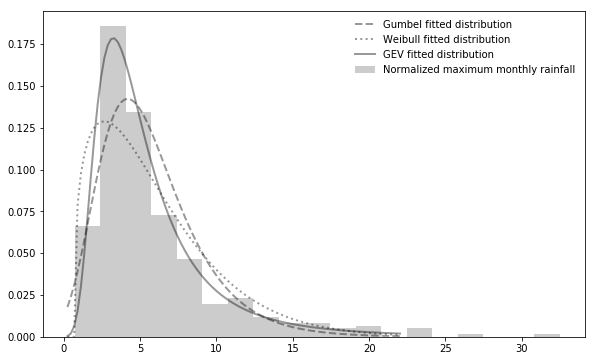

In [5]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.gca()
ax.hist(extreme['RF [mm]'], bins='sqrt', normed=True, color='k', alpha=0.2, label='Normalized maximum monthly rainfall')
x = np.linspace(gr.ppf(0.01),gr.ppf(0.999), 100)
ax.plot(x, gr.pdf(x), 'k--', lw=2, alpha=0.4, label='Gumbel fitted distribution')
ax.plot(x, wb.pdf(x), 'k:', lw=2, alpha=0.4, label='Weibull fitted distribution')
ax.plot(x, gev.pdf(x), 'k-', lw=2, alpha=0.4, label='GEV fitted distribution')
ax.legend(frameon=False)